In [1]:
import pandas as pd

df = pd.read_csv("D:/Data Analytics/Mortage Portfolio Performance Analyzer/Loan_default.csv")

print(f"Total No. of Loans: {df.shape[0]}")
print(f"No. of Attributes per Loan: {df.shape[1]}")

print("\nColumn Names:")
print(df.columns.tolist())

print("\nFirst 5 Rows:")
print(df.head())

print("\nData Types:")
df.info()

print("\nMissing Values per Column:")
print(df.isna().sum())

print("\nBasic Statistics:")
print(df.describe())

Total No. of Loans: 255347
No. of Attributes per Loan: 18

Column Names:
['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']

First 5 Rows:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         2

In [2]:
print("   PORTFOLIO OVERVIEW METRICS")
print(f"Total Loans:          {df['LoanID'].count():,}")
print(f"Total Amount Lent:    ${df['LoanAmount'].sum():,}")
print(f"Avg Interest Rate:    {df['InterestRate'].mean():.2f}%")
print(f"Avg Credit Score:     {df['CreditScore'].mean():.0f}")
print(f"Total Defaults:       {df['Default'].sum():,}")
print(f"Overall Default Rate: {df['Default'].mean()*100:.2f}%")
print(f"Avg Borrower Income:  ${df['Income'].mean():,.0f}")

   PORTFOLIO OVERVIEW METRICS
Total Loans:          255,347
Total Amount Lent:    $32,576,880,572
Avg Interest Rate:    13.49%
Avg Credit Score:     574
Total Defaults:       29,653
Overall Default Rate: 11.61%
Avg Borrower Income:  $82,499


In [3]:
df['Risk_Category'] = df['CreditScore'].apply(
    lambda x: 'Low Risk' if x > 750 else 'High Risk' if x < 650 else 'Medium Risk'
)

count = df.groupby('Risk_Category')['LoanID'].count()
print("\nBorrower Count per Risk Category:")
print(count.apply(lambda x: f"{x:,}"))

rate = df.groupby('Risk_Category')['Default'].mean() * 100
print("\nDefault Rate per Risk Category:")
print(rate.apply(lambda x: f"{x:.2f}%"))

total_loan_amount = df.groupby('Risk_Category')['LoanAmount'].sum()
print("\nTotal Loan Exposure per Risk Category:")
print(total_loan_amount.apply(lambda x: f"${x:,}"))

avg_credit_score = df.groupby('Risk_Category')['CreditScore'].mean()
print("\nAvg Credit Score per Risk Category:")
print(avg_credit_score.apply(lambda x: f"{x:.0f}"))


Borrower Count per Risk Category:
Risk_Category
High Risk      162,766
Low Risk        46,113
Medium Risk     46,468
Name: LoanID, dtype: object

Default Rate per Risk Category:
Risk_Category
High Risk      12.28%
Low Risk       10.07%
Medium Risk    10.82%
Name: Default, dtype: object

Total Loan Exposure per Risk Category:
Risk_Category
High Risk      $20,769,742,447
Low Risk        $5,879,978,686
Medium Risk     $5,927,159,439
Name: LoanAmount, dtype: object

Avg Credit Score per Risk Category:
Risk_Category
High Risk      474
Low Risk       800
Medium Risk    700
Name: CreditScore, dtype: object


In [4]:
df['Income_Group'] = df['Income'].apply(
    lambda x: 'Low Income' if x < 30000 else 'High Income' if x > 70000 else 'Middle Income'
)

borrower = df.groupby('Income_Group')['LoanID'].count()
print("\nTotal Borrowers per Income Group:")
print(borrower.apply(lambda x: f"{x:,}"))

default_rate = df.groupby('Income_Group')['Default'].mean() * 100
print("\nDefault Rate per Income Group:")
print(default_rate.apply(lambda x: f"{x:.2f}%"))

avg_dti = df.groupby('Income_Group')['DTIRatio'].mean()
print("\nAverage DTI Ratio per Income Group:")
print(avg_dti.apply(lambda x: f"{x:.2f}"))

loan_exposure = df.groupby('Income_Group')['LoanAmount'].sum()
print("\nTotal Loan Exposure per Income Group:")
print(loan_exposure.apply(lambda x: f"${x:,}"))
print(f"\nHighest Exposure: {loan_exposure.idxmax()} at ${loan_exposure.max():,}")

avg_intrate = df.groupby('Income_Group')['InterestRate'].mean()
print("\nAverage Interest Rate per Income Group:")
print(avg_intrate.apply(lambda x: f"{x:.2f}%"))


Total Borrowers per Income Group:
Income_Group
High Income      151,502
Low Income        28,402
Middle Income     75,443
Name: LoanID, dtype: object

Default Rate per Income Group:
Income_Group
High Income       9.38%
Low Income       21.96%
Middle Income    12.20%
Name: Default, dtype: object

Average DTI Ratio per Income Group:
Income_Group
High Income      0.50
Low Income       0.50
Middle Income    0.50
Name: DTIRatio, dtype: object

Total Loan Exposure per Income Group:
Income_Group
High Income      $19,317,323,733
Low Income        $3,632,507,271
Middle Income     $9,627,049,568
Name: LoanAmount, dtype: object

Highest Exposure: High Income at $19,317,323,733

Average Interest Rate per Income Group:
Income_Group
High Income      13.47%
Low Income       13.49%
Middle Income    13.53%
Name: InterestRate, dtype: object


In [5]:
df['LTV'] = df['LoanAmount'] / df['Income']

df['LTV_Category'] = df['LTV'].apply(
    lambda x: 'Low LTV' if x < 0.5 else 'High LTV' if x > 0.8 else 'Medium LTV'
)

df['DTI_Category'] = df['DTIRatio'].apply(
    lambda x: 'Low DTI' if x < 0.35 else 'High DTI' if x > 0.5 else 'Medium DTI'
)

ltv_rate = df.groupby('LTV_Category')['Default'].mean() * 100
print("\nDefault Rate per LTV Category:")
print(ltv_rate.apply(lambda x: f"{x:.2f}%"))

dti_rate = df.groupby('DTI_Category')['Default'].mean() * 100
print("\nDefault Rate per DTI Category:")
print(dti_rate.apply(lambda x: f"{x:.2f}%"))

cols = ['LTV', 'DTIRatio', 'CreditScore', 'InterestRate', 'Default']
correlation = df[cols].corr().round(2)
print("\nCorrelation Matrix:")
print(correlation)

comb = df.groupby(['LTV_Category', 'DTI_Category'])['Default'].mean() * 100
print("\nDefault Rate by LTV + DTI Combination:")
print(comb.apply(lambda x: f"{x:.2f}%"))

highest = comb.idxmax()
print(f"\nHighest Risk Combination: {highest[0]} + {highest[1]} at {comb.max():.2f}%")


Default Rate per LTV Category:
LTV_Category
High LTV      12.83%
Low LTV        7.69%
Medium LTV     8.32%
Name: Default, dtype: object

Default Rate per DTI Category:
DTI_Category
High DTI      12.15%
Low DTI       10.82%
Medium DTI    11.52%
Name: Default, dtype: object

Correlation Matrix:
               LTV  DTIRatio  CreditScore  InterestRate  Default
LTV           1.00      0.00        -0.00         -0.00     0.18
DTIRatio      0.00      1.00        -0.00          0.00     0.02
CreditScore  -0.00     -0.00         1.00          0.00    -0.03
InterestRate -0.00      0.00         0.00          1.00     0.13
Default       0.18      0.02        -0.03          0.13     1.00

Default Rate by LTV + DTI Combination:
LTV_Category  DTI_Category
High LTV      High DTI        13.41%
              Low DTI         11.97%
              Medium DTI      12.71%
Low LTV       High DTI         8.03%
              Low DTI          7.15%
              Medium DTI       7.69%
Medium LTV    High DTI    

In [6]:
df['Loan_Size'] = df['LoanAmount'].apply(
    lambda x: 'Small' if x < 50000 else 'Large' if x > 200000 else 'Medium'
)

count = df.groupby('Loan_Size')['LoanID'].count()
print("\nLoan Count per Size Category:")
print(count.apply(lambda x: f"{x:,}"))

dr = df.groupby('Loan_Size')['Default'].mean() * 100
print("\nDefault Rate per Loan Size:")
print(dr.apply(lambda x: f"{x:.2f}%"))

exp = df.groupby('Loan_Size')['LoanAmount'].sum()
print("\nTotal Portfolio Exposure per Loan Size:")
print(exp.apply(lambda x: f"${x:,}"))

total = df['LoanAmount'].sum()
percent = (exp / total) * 100
print("\nPortfolio Concentration per Loan Size:")
print(percent.apply(lambda x: f"{x:.2f}%"))

avgir = df.groupby('Loan_Size')['InterestRate'].mean()
print("\nAverage Interest Rate per Loan Size:")
print(avgir.apply(lambda x: f"{x:.2f}%"))

credit = df.groupby('Loan_Size')['CreditScore'].mean()
print("\nAverage Credit Score per Loan Size:")
print(credit.apply(lambda x: f"{x:.0f}"))


Loan Count per Size Category:
Loan_Size
Large      52,419
Medium    155,838
Small      47,090
Name: LoanID, dtype: object

Default Rate per Loan Size:
Loan_Size
Large     15.79%
Medium    11.28%
Small      8.06%
Name: Default, dtype: object

Total Portfolio Exposure per Loan Size:
Loan_Size
Large     $11,794,421,783
Medium    $19,488,699,480
Small      $1,293,759,309
Name: LoanAmount, dtype: object

Portfolio Concentration per Loan Size:
Loan_Size
Large     36.20%
Medium    59.82%
Small      3.97%
Name: LoanAmount, dtype: object

Average Interest Rate per Loan Size:
Loan_Size
Large     13.47%
Medium    13.50%
Small     13.49%
Name: InterestRate, dtype: object

Average Credit Score per Loan Size:
Loan_Size
Large     574
Medium    575
Small     573
Name: CreditScore, dtype: object


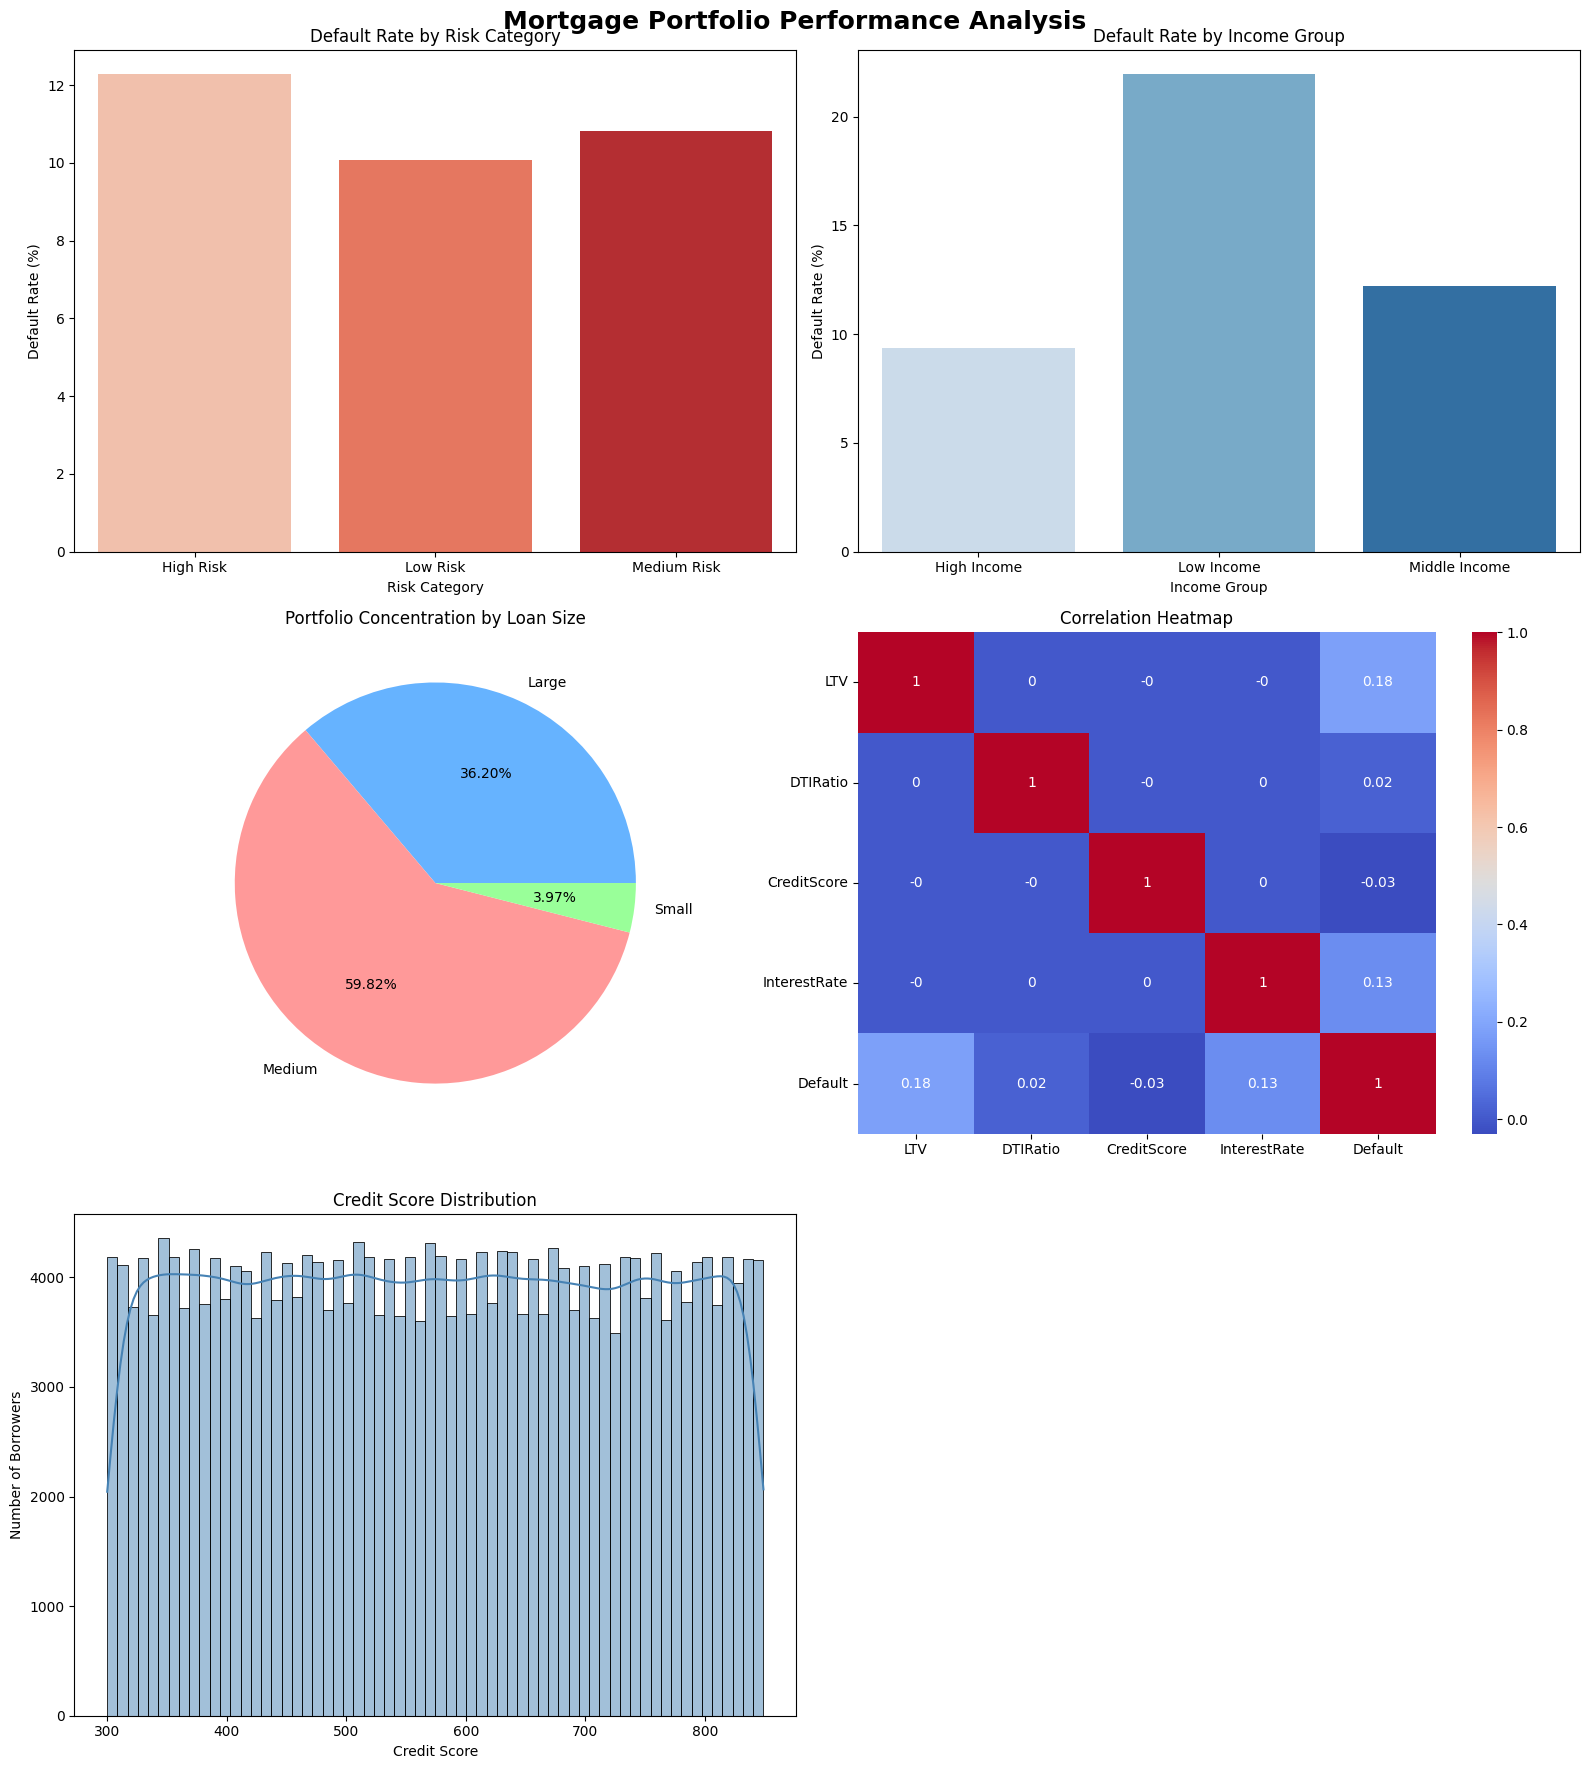

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Mortgage Portfolio Performance Analysis", fontsize=18, fontweight='bold')

risk = df.groupby('Risk_Category')['Default'].mean().reset_index()
risk['Default'] *= 100
sns.barplot(data=risk, x='Risk_Category', y='Default', 
            hue='Risk_Category', palette='Reds', legend=False, ax=axes[0, 0])
axes[0, 0].set_title("Default Rate by Risk Category")
axes[0, 0].set_xlabel("Risk Category")
axes[0, 0].set_ylabel("Default Rate (%)")

income_group = df.groupby('Income_Group')['Default'].mean().reset_index()
income_group['Default'] *= 100
sns.barplot(data=income_group, x='Income_Group', y='Default', 
            hue='Income_Group', palette='Blues', legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Default Rate by Income Group")
axes[0, 1].set_xlabel("Income Group")
axes[0, 1].set_ylabel("Default Rate (%)")

loan_size_exp = df.groupby('Loan_Size')['LoanAmount'].sum()
axes[1, 0].pie(loan_size_exp, labels=loan_size_exp.index, autopct='%1.2f%%',
               colors=['#66b3ff', '#ff9999', '#99ff99'])
axes[1, 0].set_title("Portfolio Concentration by Loan Size")

cols = ['LTV', 'DTIRatio', 'CreditScore', 'InterestRate', 'Default']
sns.heatmap(df[cols].corr().round(2), annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title("Correlation Heatmap")

sns.histplot(df['CreditScore'], kde=True, color='steelblue', ax=axes[2, 0])
axes[2, 0].set_title("Credit Score Distribution")
axes[2, 0].set_xlabel("Credit Score")
axes[2, 0].set_ylabel("Number of Borrowers")

axes[2, 1].set_visible(False)

plt.tight_layout()
plt.show()

In [15]:
total_loans = df['LoanID'].count()
total_amount = df['LoanAmount'].sum()
overall_default_rate = df['Default'].mean() * 100

risk_default = df.groupby('Risk_Category')['Default'].mean() * 100
riskiest_category = risk_default.idxmax()
riskiest_rate = risk_default.max()

income_default = df.groupby('Income_Group')['Default'].mean() * 100
worst_income_group = income_default.idxmax()
worst_income_rate = income_default.max()

loan_exposure = df.groupby('Loan_Size')['LoanAmount'].sum()
exposure_pct = (loan_exposure / loan_exposure.sum()) * 100
largest_exposure_group = exposure_pct.idxmax()
largest_exposure_pct = exposure_pct.max()

cols = ['LTV', 'DTIRatio', 'CreditScore', 'InterestRate', 'Default']
corr_matrix = df[cols].corr()
default_corr = corr_matrix['Default'].drop('Default')
most_correlated_factor = default_corr.abs().idxmax()
correlation_value = default_corr[most_correlated_factor]

ltv_dti_risk = df.groupby(['LTV_Category', 'DTI_Category'])['Default'].mean() * 100
highest_combo = ltv_dti_risk.idxmax()
highest_combo_rate = ltv_dti_risk.max()

if overall_default_rate > 15:
    risk_level = "🔴 HIGH RISK"
elif overall_default_rate > 10:
    risk_level = "🟡 MEDIUM RISK"
else:
    risk_level = "🟢 LOW RISK"


print(f"\n📁 PORTFOLIO SIZE")
print(f"   Total Loans        : {total_loans:,}")
print(f"   Total Amount Lent  : ${total_amount:,}")
print(f"   Overall Default Rate: {overall_default_rate:.2f}%")
print(f"   Portfolio Risk Level: {risk_level}")

print(f"\n⚠️  RISKIEST BORROWERS")
print(f"   {riskiest_category} borrowers have the highest")
print(f"   default rate at {riskiest_rate:.2f}%")

print(f"\n💸 MOST VULNERABLE INCOME GROUP")
print(f"   {worst_income_group} group defaults the most")
print(f"   at {worst_income_rate:.2f}%")

print(f"\n🏦 BIGGEST PORTFOLIO EXPOSURE")
print(f"   {largest_exposure_group} loans hold the largest share")
print(f"   of the portfolio at {largest_exposure_pct:.2f}%")

print(f"\n📊 CORRELATION INSIGHTS")
direction = "positive" if correlation_value > 0 else "negative"
print(f"   {most_correlated_factor} has the strongest {direction}")
print(f"   correlation with default ({correlation_value:.2f})")

print(f"\n🔥 HIGHEST RISK COMBINATION")
print(f"   {highest_combo[0]} + {highest_combo[1]} has the")
print(f"   highest default rate at {highest_combo_rate:.2f}%")

print(f"\n✅ KEY RECOMMENDATION")
print(f"   Tighten lending standards for High LTV and")
print(f"   High DTI borrowers. Consider stricter approval")
print(f"   criteria or risk-based pricing for the highest")
print(f"   risk segments to reduce portfolio default exposure.")


📁 PORTFOLIO SIZE
   Total Loans        : 255,347
   Total Amount Lent  : $32,576,880,572
   Overall Default Rate: 11.61%
   Portfolio Risk Level: 🟡 MEDIUM RISK

⚠️  RISKIEST BORROWERS
   High Risk borrowers have the highest
   default rate at 12.28%

💸 MOST VULNERABLE INCOME GROUP
   Low Income group defaults the most
   at 21.96%

🏦 BIGGEST PORTFOLIO EXPOSURE
   Medium loans hold the largest share
   of the portfolio at 59.82%

📊 CORRELATION INSIGHTS
   LTV has the strongest positive
   correlation with default (0.18)

🔥 HIGHEST RISK COMBINATION
   High LTV + High DTI has the
   highest default rate at 13.41%

✅ KEY RECOMMENDATION
   Tighten lending standards for High LTV and
   High DTI borrowers. Consider stricter approval
   criteria or risk-based pricing for the highest
   risk segments to reduce portfolio default exposure.
